In [190]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Simple visualization of sleep and activity data since January 2020 to July 2020|

In [191]:
sleep = pd.read_csv('Clean_Sleep_Data.csv')
activity = pd.read_csv('Clean_Activity_Data.csv')

#### Concatenate sleep and activity dataframes

In [192]:
fit = pd.concat([activity, sleep], axis=1)
fit.head(1)

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active(Fat Burn),Minutes Fairly Active(Cardio),Minutes Very Active(Peak),Activity Calories,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-01-01,2736,10201,4.46,6,633,341,10,24,1482,2020-01-01 01:16:00,2020-01-01 08:28:00,334,98,20,432,47.0,242.0,45.0


##### Drop time columns 

In [193]:
fit = fit.drop(columns=['Date', 'Start Time', 'End Time'], axis=1)
fit.head(1)

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active(Fat Burn),Minutes Fairly Active(Cardio),Minutes Very Active(Peak),Activity Calories,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2736,10201,4.46,6,633,341,10,24,1482,334,98,20,432,47.0,242.0,45.0


#### Select columns for interest and set x1 and y_col axis

In [194]:
x1 = fit['Distance']
y_cols =  ['Minutes Asleep', 'Number of Awakenings', 'Minutes REM Sleep', 'Minutes Deep Sleep']

#### Scatter plots of selected columns in x1 and y_cols 

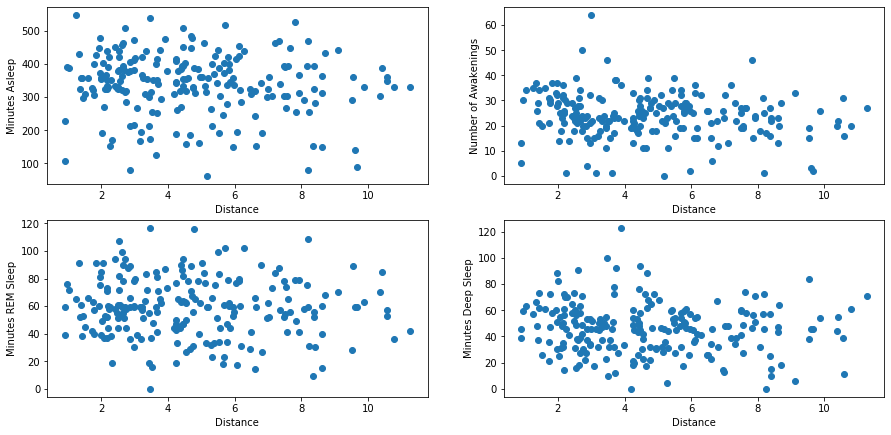

In [195]:
plt.figure(figsize=(15, 15))
cnt = 1
for y in y_cols:
    plt.subplot(4,2, cnt)
    plt.scatter(x1,sleep[y])
    plt.ylabel(y)
    plt.xlabel('Distance')
    cnt=cnt+1
plt.show()

#### Heatmap showing potential correlation amoung columns

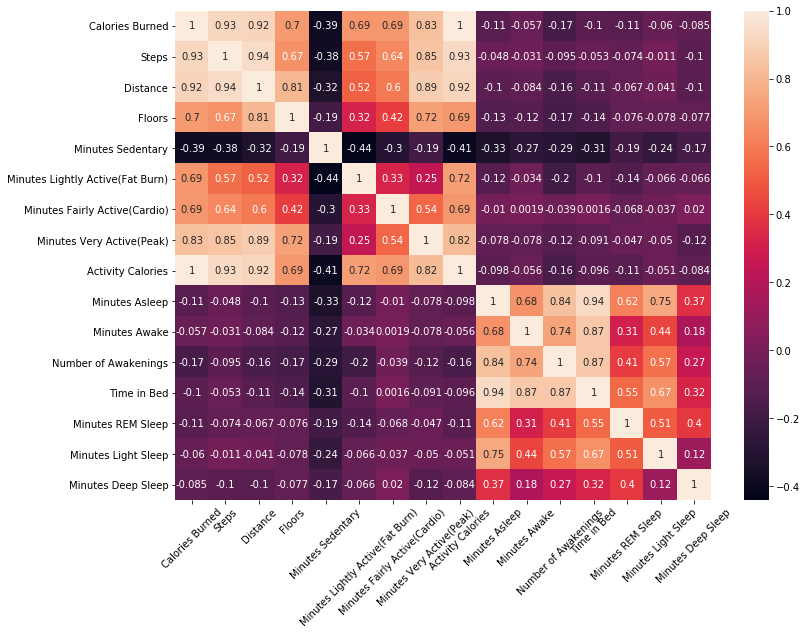

In [196]:
# Create the correalation
fit = fit.corr()

#Plot the correlation
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(fit, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()